In [31]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [32]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary'])
df = df.replace(' ?', np.nan)
df.dropna(inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
print(df.salary.value_counts())

 <=50K    22654
 >50K      7508
Name: salary, dtype: int64


In [36]:
# perform label encoding on the categorical features
ohe = OneHotEncoder()
le = LabelEncoder()
df.salary = le.fit_transform(df.salary)
df = pd.get_dummies(df, columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df.shape

(30162, 105)

In [38]:
max_acc = 0
acc_list = []
param_list = []
for i in range(10):
    sample_df = df.sample(frac=0.40, replace=False)
    x_train, x_test, y_train, y_test = train_test_split(sample_df.drop('salary', axis=1), sample_df.salary, test_size=0.3, random_state=42, stratify=sample_df.salary)
    x_train = StandardScaler().fit_transform(x_train)
    param_grid = { 
                'C':[0.1, 0.5, 1, 2, 3],
                'kernel':['rbf', 'poly', 'sigmoid', 'linear'],
                'degree':[1, 2, 3, 4],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
                }
    
    grid = GridSearchCV(SVC(max_iter=100), param_grid)
    grid.fit(x_train, y_train)  
    y_pred = grid.predict(x_test)
    print(grid.best_params_)
    print('Sample {}'.format(i+1))
    print('Accuracy: {}\n'.format(accuracy_score(y_test, y_pred))) 
    
    acc_list.append(accuracy_score(y_test, y_pred))
    param_list.append(grid.best_params_)
    
    if accuracy_score(y_test, y_pred) > max_acc:
        max_acc = accuracy_score(y_test, y_pred)
        best_params = grid.best_params_
        best_model = grid.best_estimator_
        best_sample_df = sample_df

{'C': 0.5, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 1
Accuracy: 0.7549723756906077

{'C': 2, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 2
Accuracy: 0.7538674033149171

{'C': 0.5, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
Sample 3
Accuracy: 0.7522099447513813

{'C': 0.5, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 4
Accuracy: 0.7488950276243094

{'C': 0.5, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 5
Accuracy: 0.7480662983425415

{'C': 0.5, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 6
Accuracy: 0.7511049723756906

{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 7
Accuracy: 0.7505524861878453

{'C': 0.5, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 8
Accuracy: 0.7458563535911602

{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 9
Accuracy: 0.7530386740331492

{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 10
Accuracy: 0.7511049723756906



In [ ]:
print(acc_list)
print(param_list)

[0.7528735632183908, 0.75552608311229, 0.7462422634836428, 0.7541998231653404, 0.7550839964633068, 0.7519893899204244, 0.7524314765694076, 0.746684350132626, 0.7480106100795756, 0.7449160035366932]
[{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 2, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 2, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 3, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}, {'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}]


In [ ]:
final_df = pd.DataFrame(data=[acc_list, param_list], index=['Accuracy', 'Parameters']).T
final_df

,Accuracy,Parameters
0,0.752874,"{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
1,0.755526,"{'C': 2, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
2,0.746242,"{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
3,0.7542,"{'C': 2, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
4,0.755084,"{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
5,0.751989,"{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
6,0.752431,"{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
7,0.746684,"{'C': 3, 'degree': 1, 'gamma': 0.01, 'kernel':..."
8,0.748011,"{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
9,0.744916,"{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': ..."


In [ ]:
print(max_acc)
print(best_params)
print(best_model)
best_sample_df.head()

0.75552608311229
{'C': 2, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=2, degree=1, gamma=0.1, max_iter=1000)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
32537,30,2,345898,11,9,4,2,1,2,1,0,0,46,38,0
17849,39,4,107233,11,9,4,2,2,0,1,0,0,40,38,0
6903,54,5,197184,9,13,2,3,0,4,1,0,0,38,38,0
14988,34,2,185041,11,9,4,9,1,4,0,0,1669,45,38,0
23335,19,2,307496,15,10,4,7,3,4,0,0,0,23,38,0


In [ ]:
iterations = list()
acc_list = list()
x_train, x_test, y_train, y_test = train_test_split(best_sample_df.drop('salary', axis=1), best_sample_df.salary, test_size=0.3, random_state=42, stratify=best_sample_df.salary)
x_train = StandardScaler().fit_transform(x_train)

for i in range(100):
    x = i+1
    svm = SVC(C=2, degree=1, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)

In [ ]:
iterations = np.array(iterations)
acc_list = np.array(acc_list)

In [ ]:
print(iterations.shape)
print(acc_list.shape)

(100,)
(100,)


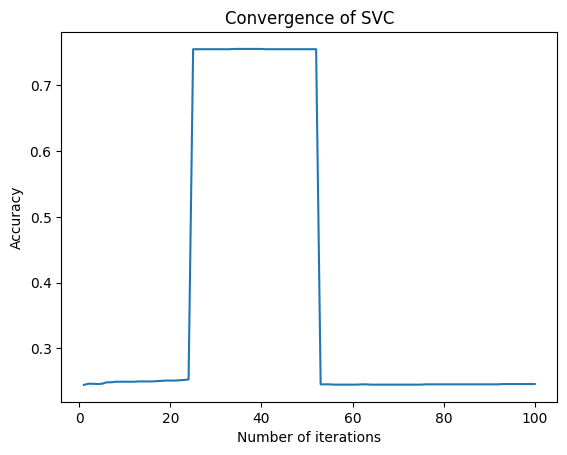

In [22]:
plt.plot(iterations, acc_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()